<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Fundamental of Statistics
This notebook provides a high-level overview of fundemantal statistics and functions used and available in data science. This is not meant to provide theory or understanding of statistic concepts. This includes metrics used in statistics, distributions and hypothesis testing. The purpose is not to discuss the theory behind statistical methods but to introduce the student to those statisticsal methods relevant to data science.

# Table of Contents
[Python Libraries Used in this Notebook](#Python-Libraries-Used-in-this-Notebook)

[Fundamental of Statistics for Data Science](#Fundamental-of-Statistics-for-Data-Science)

- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)

- [Descriptive Statistics](#Descriptive-Statistics)

- [Population and Population Sample](#Population-and-Population-Sample)

- [Interquartile range](#Interquartile-range)

- [Boxplots](#Boxplots)

- [Descriptive Statistics Example 1](#Descriptive-Statistics-Example-1)

- [Descriptive Statistics Example 2](#Descriptive-Statistics-Example-2)

[Distributions: Mean, Median, & Mode](#Distributions:-Mean,-Median,-&-Mode)

[Frequency and Distributions](#Frequency-and-Distributions)

- [Binomial Distribution](#Binomial-Distribution)

- [Poisson Distribution](#Poisson-Distribution)

- [Exponential Distribution](#Exponential-Distribution)

- [Rayleigh Distribution (OPTIONAL)](#Rayleigh-Distribution-(OPTIONAL))

- [Power Function Distribution (OPTIONAL)](#Power-Function-Distribution-(OPTIONAL))

- [Gamma Distribution (OPTIONAL)](#Gamma-Distribution-(OPTIONAL))

[Correcting Distributions: Transformation with BOX-COX (OPTIONAL)](#Correcting-Distributions:-Transformation-with-BOX-COX-(OPTIONAL))

[Central Limit Theorem](#Central-Limit-Theorem)

[Outlier Detection with z-Score](#Outlier-Detection-with-z-Score)

# Python Libraries Used in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as st
from scipy.stats import binom, iqr
from scipy.special import boxcox, inv_boxcox

import seaborn as sns
import matplotlib.pyplot as plt

# Fundamental of Statistics for Data Science
[Return to Table of Contents](#Table-of-Contents)

Statistical knowledge helps you use the proper methods to collect the data, employ the correct analyses, and effectively present the results. Statistics is a crucial process behind how we make discoveries in science, decisions based on data, and make predictions.

### Descriptive and Inferential Statistics
[Return to Table of Contents](#Table-of-Contents)

 - <b>Descriptive:</b> describes data you have but can't be generalized beyond that (e.g. median)
 - <b>Inferential: </b> enables inferences about the population beyond our data (e.g. t-test)

Both approaches are used in Machine Learning:
Supervised Learning:
- kNN (k Nearest Neighbors)
- Naïve Bayes
- Logistic Regression
- Support Vector Machines
- Random Forests
Unsupervised Learning:
- Clustering
- Factor analysis
- Latent Dirichlet Allocation

<b>Example Buisiness Questions:</b> <br>
- Simple (descriptive) Stats: “Who are the most profitable customers?”
- Hypothesis Testing: “Is there a difference in value to the company of these customers?”
- Segmentation/Classification: What are the common characteristics of these customers?
- Prediction: Will this new customer become a profitable customer?   If so, how profitable?

### Descriptive Statistics
[Return to Table of Contents](#Table-of-Contents)

<b>Mean:</b>  sum of scores/num of scores. <br>
$$\bar{x} = \mu(X) = \mu_x = \frac{1}{{N}}\sum\limits_{i}^{N}{x_i} $$
$$\bar{y} = \mu(Y) = \mu_y = \frac{1}{{N}}\sum\limits_{i}^{N}{y_i} $$
- Not useful when a distribution contains a few extreme scores. Example: 1985 Salary Survey New Geography Graduates
- Inappropriate when data are measured on an ordinal scale (ranks)
- Measure of central tendency.<br>

<b>Median:</b>  Find the one at the center when sort from smallest to biggest <br>
- Advantage: the median is relatively unaffected by extreme scores
- How to find the median from frequency distributions? <br>

<b>Mode:</b> 
    most frequently occurring category or score in the distribution <br>
- Corresponds to the peak or high point of the distribution.
- Possible for a distribution to have more than one mode (e.g. bimodal).
    - A distribution may have a major mode at the highest peak and a minor mode at a secondary peak in a different location
    - Do not forget a distribution can have only one mean and only one median. 
    
<b>Variance/Variability</b> is a measure of dispersion (i.e., how far a set of numbers is spread out from their average value in  distribution). Serves both as a descriptive measure and as an important component of most inferential statistics.  Variability can be measured with the range, the interquartile range or the standard deviation/variance. In each case, variability is determined by measuring distance. The standard deviation is the square root of variance. The range is the total distance covered by the distribution, from the highest score to the lowest score (using the upper and lower real limits of the range). 

$$\mathrm{Var}(X) = \frac{1}{{N}} \sum\limits_{i}^{N}{(x_i – \bar{x})^2} $$

$$\mathrm{Var}(Y) = \frac{1}{{N}} \sum\limits_{i}^{N}{(y_i – \bar{y})^2} $$

$$\mathrm{Var}(E) = \frac{1}{{N}} \sum\limits_{i}^{N}{(e_i – \bar{e})^2} $$
- In __Descriptive statistics__, variability measures the degree to which the scores are spread out or clustered together in a distribution.  
- In __Inferential statistics__, variability provides a measure of how accurately any individual score or sample represents the entire population.

<b> Coefficient of Variation:</b>  A relative dispersion of data points in a data series around the mean. Ratio of the standard deviation to the mean.
$$\mathrm{CV}_X = \frac{\sigma_x}{\bar{x}}$$ <br>
$$\mathrm{CV}_Y = \frac{\sigma_y}{\bar{y}}$$

References:
- Python Statistics: https://docs.python.org/3/library/statistics.html
- SciPy User Guide: https://docs.scipy.org/doc/scipy/tutorial/index.html
- SciPy Statistical Distributions and Functions: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

### Population and Population Sample
[Return to Table of Contents](#Table-of-Contents)

The population is an entire group that we want to draw conclusions about

Popluation sample is a specific group that you will collect data from. The size of the sample is always less than the total size of the population.

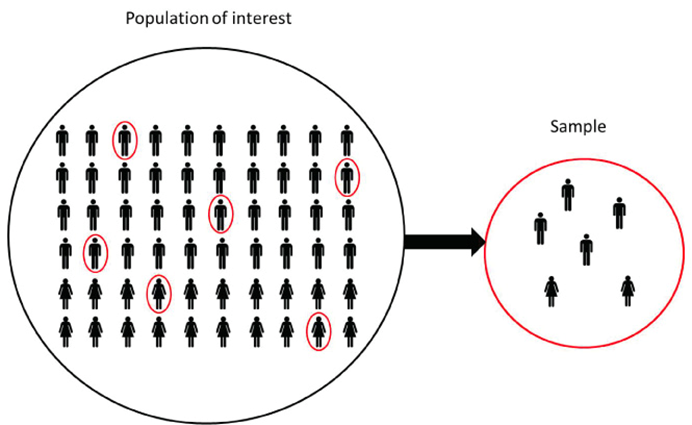
<b>Standard Deviation (SD)</b> measures the standard distance between a score and the mean. Population SD is calculated from every individual in the population. Sample SD is calculated from only some of the individuals in a population.

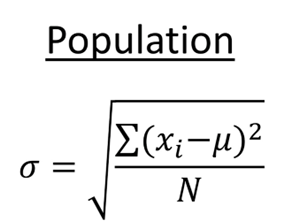
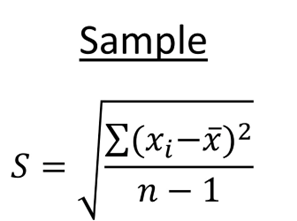

Generally: 
- 68% of the scores will be within 1 standard deviation of the mean, 
- 95% of the scores will be within a distance of 2 standard deviations of the mean
- 99.7% of the scores will be within a distance of 3 standard deviations of the mean

### Interquartile range
[Return to Table of Contents](#Table-of-Contents)

The interquartile range is the distance covered by the middle 50% of a distribution or histogram. The interquartile range is the the difference between Q1 and Q3. 
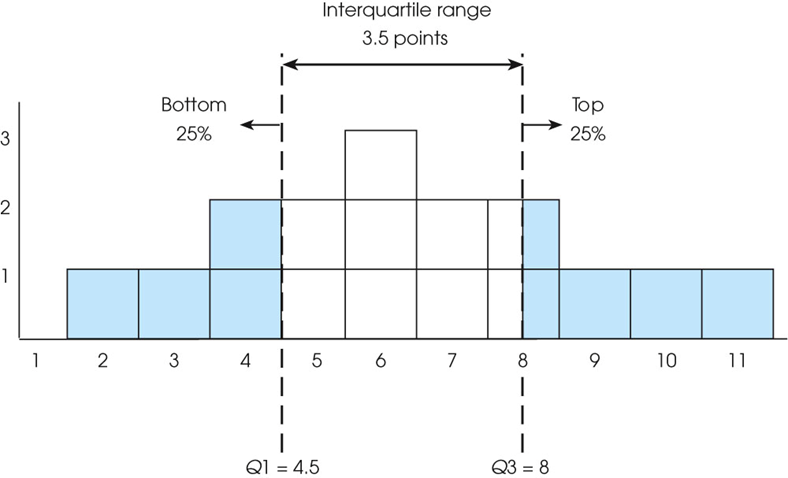

### Boxplots
[Return to Table of Contents](#Table-of-Contents)

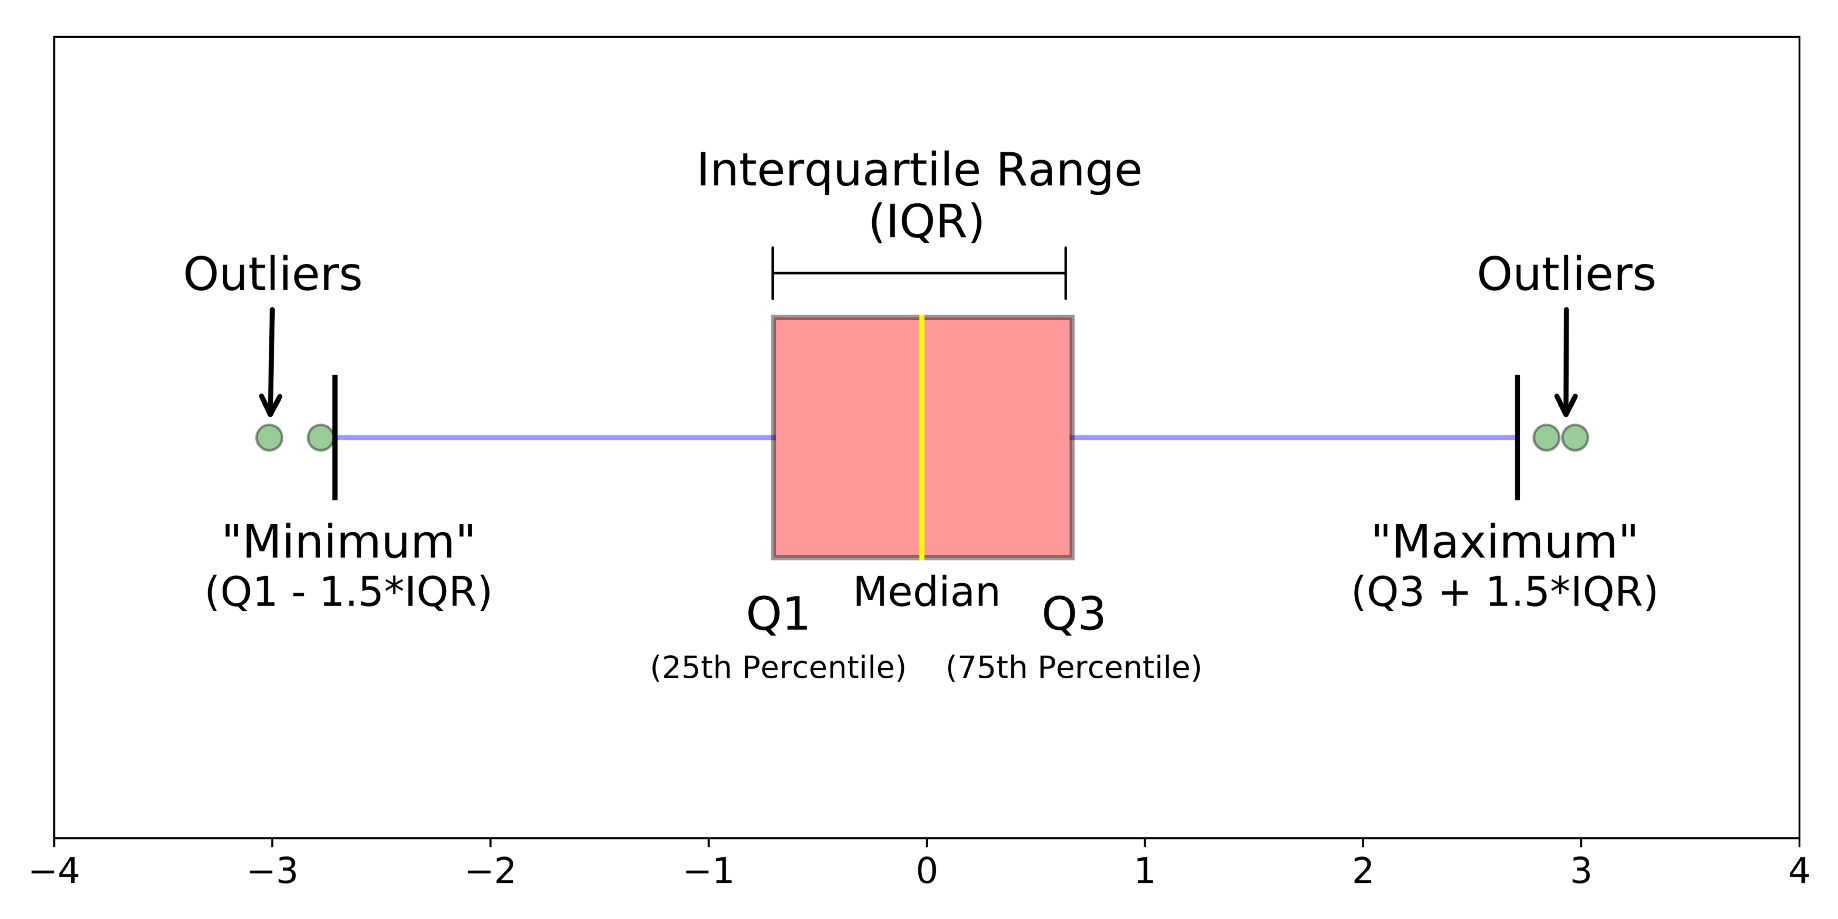

# Descriptive Statistics Example 1
[Return to Table of Contents](#Table-of-Contents)

In [2]:
np_array = np.array([6, 4, 4, 5, 8, 9, 3, 1])
# Sample Statistical measures: (https://numpy.org/doc/stable/reference/routines.statistics.html)
print("The array is:", np_array)
print("Mean of array is:", np.mean(np_array))
print("Max of array is:", np.max(np_array))
print("Min of array is:", np.min(np_array))
print("Mode of array is:", st.mode(np_array, keepdims = True))
print("Standard deviation of array is:", np.std(np_array))
print("Variance of array is:", np.var(np_array))
print("Interquartile range of array is:", iqr(np_array))

The array is: [6 4 4 5 8 9 3 1]
Mean of array is: 5.0
Max of array is: 9
Min of array is: 1
Mode of array is: ModeResult(mode=array([4]), count=array([2], dtype=int64))
Standard deviation of array is: 2.449489742783178
Variance of array is: 6.0
Interquartile range of array is: 2.75


# Descriptive Statistics Example 2
[Return to Table of Contents](#Table-of-Contents)

In [3]:
# df = pd.read_csv('distributions.csv')
df = pd.read_csv('https://raw.githubusercontent.com/fgonzaleumbc/DATA601/main/Lecture10/input_data/distributions.csv')
df.head(5)

,age,weight,income,year_of_experience,married
0,44,76,173350,11,1.0
1,49,77,97150,4,1.0
2,61,69,194300,14,1.0
3,67,65,251200,20,1.0
4,47,66,231750,17,1.0


In [4]:
df.shape

(20000, 5)

In [5]:
# Describe funtions give sample statistics for each numerical feature.
# 50% is also called the median. Measure of central tendency.
# Describe function percentiles parameter can be used to add more percentiles 
df.describe()

,age,weight,income,year_of_experience,married
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,42.486450,69.946300,155205.550000,9.51785,0.470400
std,14.393689,4.992731,45087.367102,4.46607,0.499136
min,18.000000,53.000000,49450.000000,0.00000,0.000000
25%,30.000000,66.000000,122400.000000,6.00000,0.000000
50%,42.000000,70.000000,149000.000000,9.00000,0.000000
75%,55.000000,73.000000,181400.000000,12.00000,1.000000
max,67.000000,91.000000,447950.000000,38.00000,1.000000


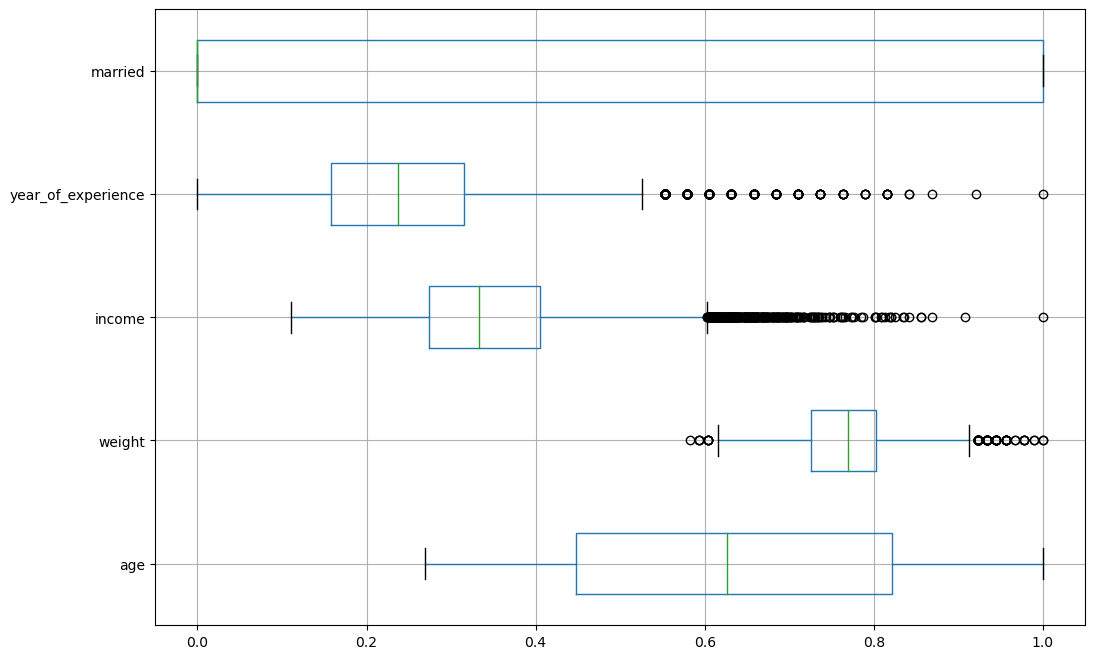

In [5]:
# Box plots for each feataure.
# Normalize each column to have an idea of distributions 
dfnormalized = df/df.max() # Normalizing data.
dfnormalized.boxplot(vert=False, figsize=(12,8));

# Distributions: Mean, Median, & Mode
[Return to Table of Contents](#Table-of-Contents)

Frequency distribution graphs are useful because they show the entire set of scores. At a glance, you can determine the highest score, the lowest score, and where the scores are centered. The distribution also shows whether the scores are clustered together or scattered over a wide range. In a positively (or negatively) skewed distribution, the scores tend to pile up on the left (or right) side of the distribution with the tail tapering off to the right (or left).

<b>Symmetrical distributions:</b> If there is only one mode, then the mode, mean, and median are all the same value. 

<b>Skewness:</b>  A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
$$\mu_3 = \frac{\sum\limits_{i}^{N}{(x_i – \bar{x})^3}}{{(N-1)\sigma_x^3}} $$

<b>Skewed distributions: </b>
- The mode will be located at the peak on one side and the mean usually will be displaced toward the tail on the other side.  
- The median is usually located between the mean and the mode.
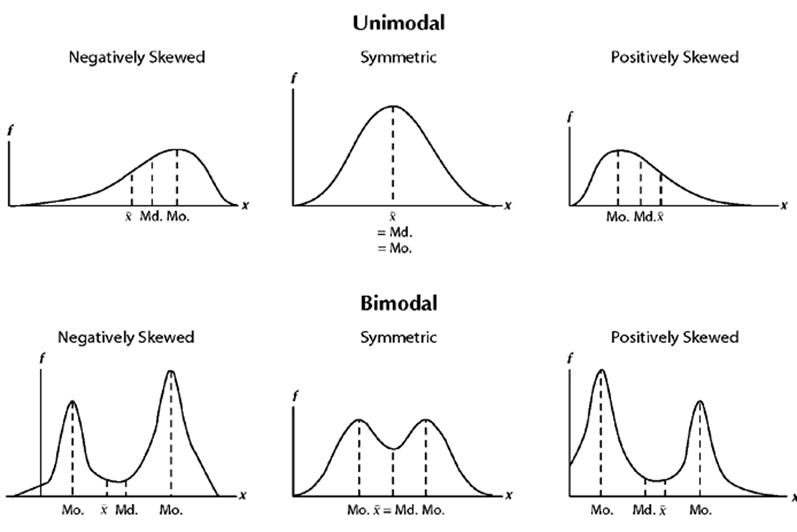

# Frequency and Distributions
[Return to Table of Contents](#Table-of-Contents)

After data collection and cleaning, we can get a general overview of the dataset with descriptive statistics
by constructing a frequency distribution. Show exactly how many individuals are located in each category on the scale of measurement.
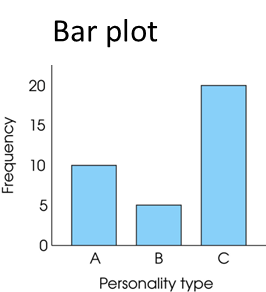
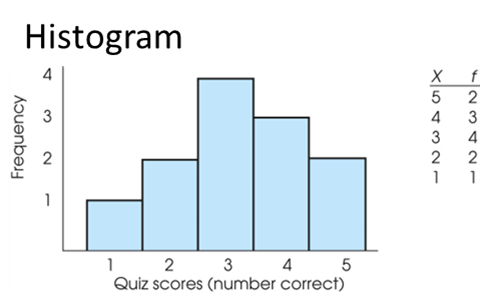
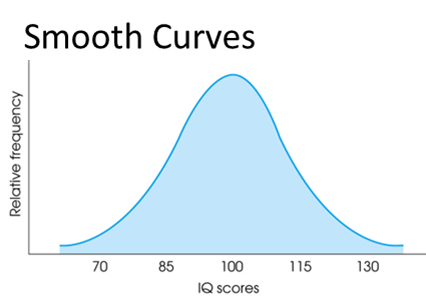



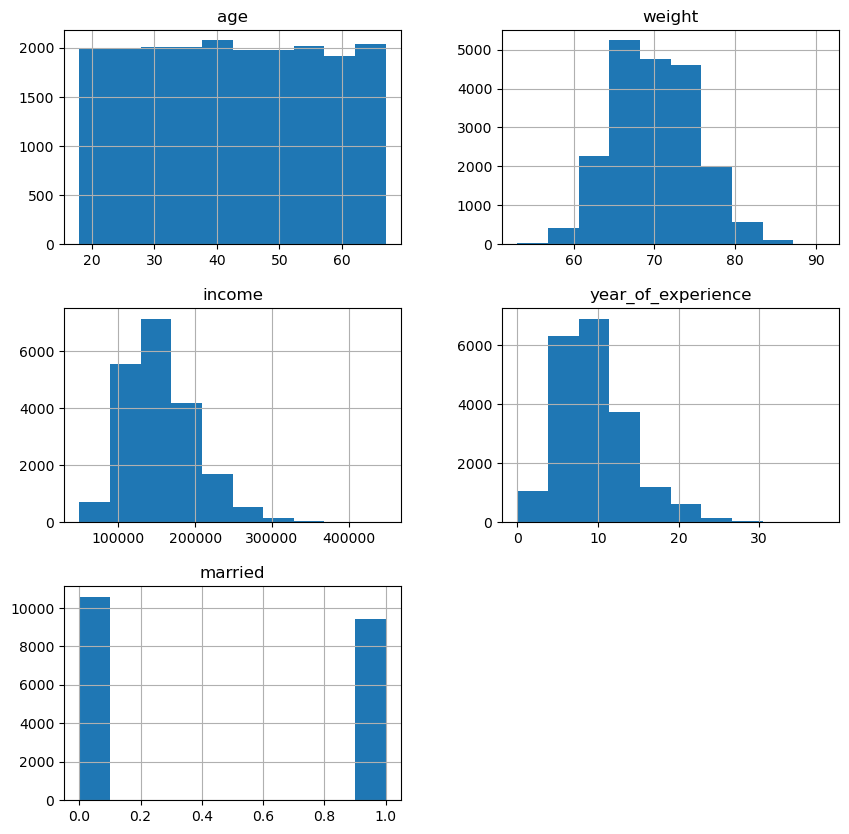

In [7]:
# The histogram provides the frequency plot for a specify numerical columns in the data.
# Depending on the dataset multiple distributions may be represented.
df.hist(figsize = [10, 10])
plt.show();
# Typically, datasets represent a sample of the population.
# Below the age is equally distributed accross the sample.
# Weight seems to  follow a Symmetric distribution.
# Income and years of experience seem to be positively skewed.
# Married is a discrete value (i.e., 0 or 1).

### Binomial Distribution
[Return to Table of Contents](#Table-of-Contents)

Binomial distributions are formed by a series of observations (for example, 100 coin tosses) for which there are exactly two possible outcomes (heads and tails). The two outcomes are identified as A and B, with probabilities of p(A) = p and p(B) = q. How many times, we get “A” if we do N experiments. The distribution shows the probability for each value of X, where X is the number of occurrences of A in a series of n observations.

Probability of x number of times for a specific outcome within n trials

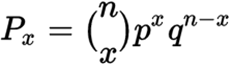
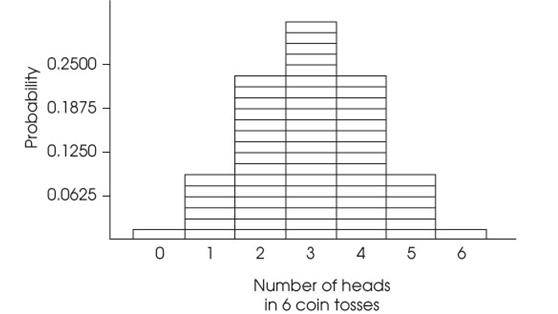

Documentation References:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

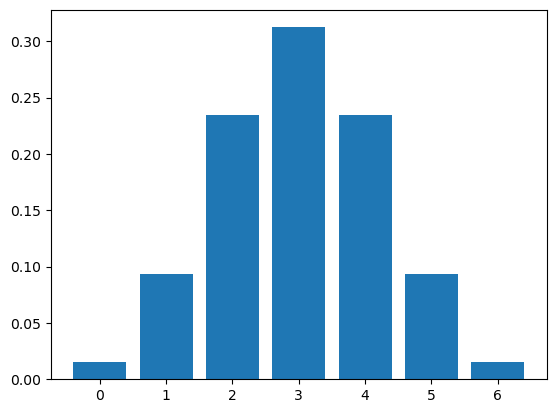

In [8]:
# Shape parameters.
n = 6 # Number of experiments or observations.
p = 0.5 # Probability of getting a head or tail.
# defining list of r values
r_values = list(range(n + 1))
# list of probability mass function (pmf) values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show();

### Poisson Distribution
[Return to Table of Contents](#Table-of-Contents)

For events with an expected separation lambda, the Poisson distribution f(k;, lambda) describes the probability of k events occurring within the observed interval lambda.

Examples
- Observed frequency of a given term in a corpus.
- Number of visits to a web site in a fixed time interval.
- Number of web site clicks in an hour. 

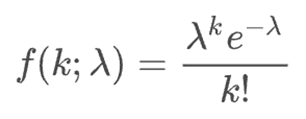

Let’s say, I typically call my brother once in three days but sometimes I call him two days in a row. If my call frequency is Poisson distributed, I can calculate the distribution of the the number of days between my phone calls in the following 10 years. See example below.

Documentation References:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

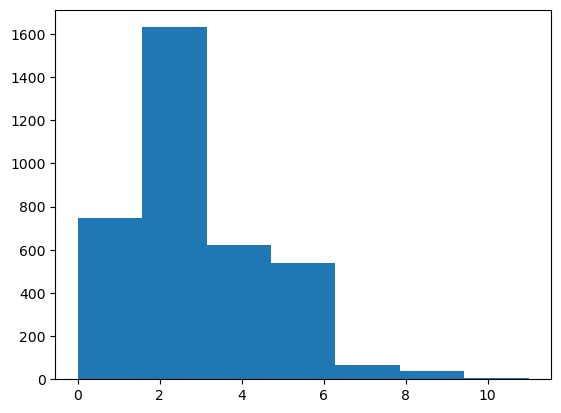

In [9]:
# lambda: Expected number of events occurring in a fixed-time interval.
# Size : Output shape. 
# In this example the size is 10 years and lambda is the average of days between calls. 
s1 = np.random.poisson(lam = 3, size = 365*10)
count, bins, ignored = plt.hist(s1, 7, density=False)
plt.show()
# The x-axis represents the average of days between calls.
# The y-axis represents the number of calls.

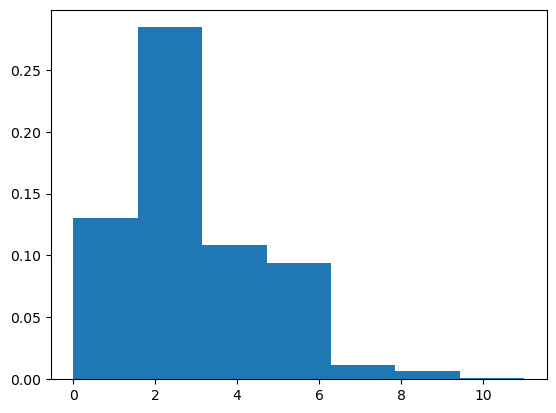

In [10]:
# Histogram with probability.
# The x-axis is the same as above (number of days between calls) but the y-axis is the probability. 
count, bins, ignored = plt.hist(s1, 7, density=True)
plt.show()

### Exponential Distribution
[Return to Table of Contents](#Table-of-Contents)

Draw samples from an exponential distribution. Its probability density function is
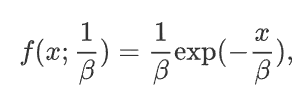
The exponential distribution is a continuous analogue of the geometric distribution. It describes many common situations, such as the size of raindrops measured over many rainstorms, or the time between page requests to Wikipedia.

Documentation References:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

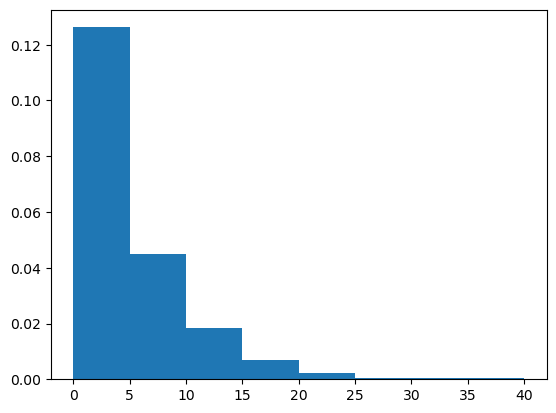

In [11]:
s4 = np.random.exponential(5, 1000)
count, bins, ignored = plt.hist(s4, bins=np.arange(0,45,5), density=True)
plt.show()

### Rayleigh Distribution (OPTIONAL)
[Return to Table of Contents](#Table-of-Contents)

A Rayleigh distribution is often observed when the overall magnitude of a vector is related to its directional components. One example where the Rayleigh distribution naturally arises is when wind velocity is analyzed in two dimensions. Assuming that each component is uncorrelated, normally distributed with equal variance, and zero mean, then the overall wind speed (vector magnitude) will be characterized by a Rayleigh distribution. A second example of the distribution arises in the case of random complex numbers whose real and imaginary components are independently and identically distributed Gaussian with equal variance and zero mean. In that case, the absolute value of the complex number is Rayleigh-distributed.
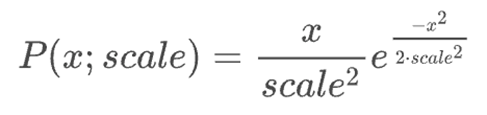

Documentation References:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.rayleigh.html

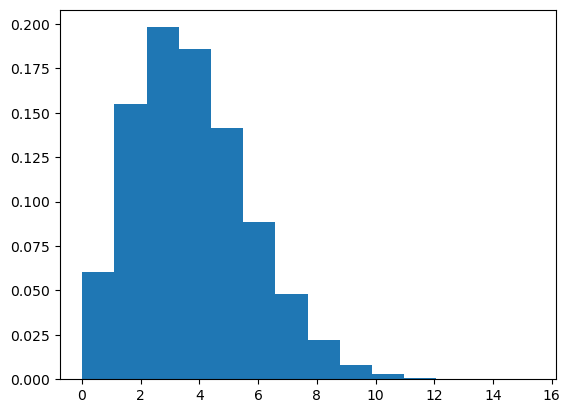

In [12]:
# Scale: Also equals the mode.
# Size: Output shape
s2 = np.random.rayleigh(scale = 3, size = 100000) # Scale 3, N=1000
count, bins, ignored = plt.hist(s2, 14, density=True) # Histogram with probability.
plt.show()

### Power Function Distribution (OPTIONAL)
[Return to Table of Contents](#Table-of-Contents)

Draws samples in [0, 1] from a power distribution with positive exponent a - 1. Also known as the power function distribution.

Documentation References:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html

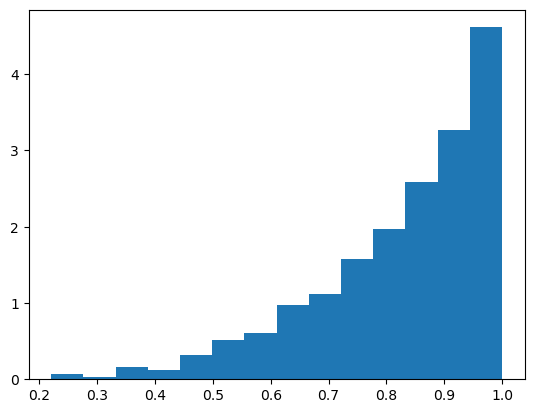

In [13]:
s3 = np.random.power(5, 1000)
count, bins, ignored = plt.hist(s3, 14, density=True)
plt.show()

### Gamma Distribution (OPTIONAL)
[Return to Table of Contents](#Table-of-Contents)

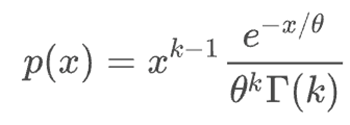
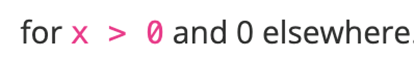
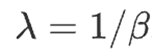

Examples:
- Times to failure of electronic components.
- The amount of time (beginning now) until an earthquake occurs has an exponential distribution. Let’s say, typically an earthquake happens once in every 5 years. This graph says that the chance of having no earthquake in 30 years in a row is almost ZERO!

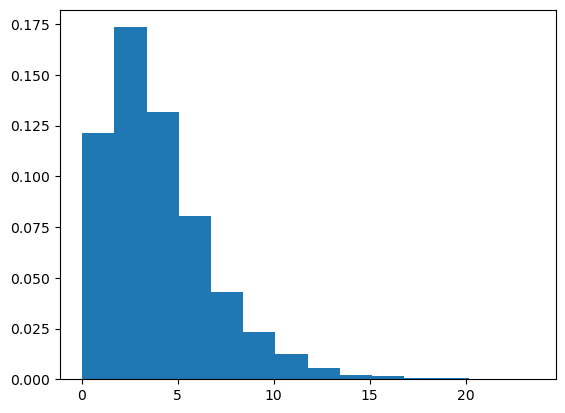

In [14]:
# Gamma Distribution.
s5 = np.random.gamma(2, 2, 10000) # If you need the description of parameters recall "shit+tab" for documentation 
count, bins, ignored = plt.hist(s5, 14, density=True)
plt.show()

# Correcting Distributions: Transformation with BOX-COX (OPTIONAL)
[Return to Table of Contents](#Table-of-Contents)

Boxcox returns a dataset transformed by a Box-Cox power transformation. It is typically used when we want to use a normal approximation. It requires the input data to be positive. The transformation does not guarantee normality.

Documentation References:
- Scipy BoxCox: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html\
- Scipy Invert BoxCox: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html

In [15]:
# Let's take our previous Gamma distribution (s5) and transform it to a normal distribution.
s5transformed, lmbd = st.boxcox(s5) # See the documentation for boxcox, especially the parameter description for lmbda.
s5transformed

array([0.47192013, 1.91987724, 1.09954371, ..., 1.01979863, 1.36838548,
       2.14060261])

In [16]:
lmbd

0.31596536506042855

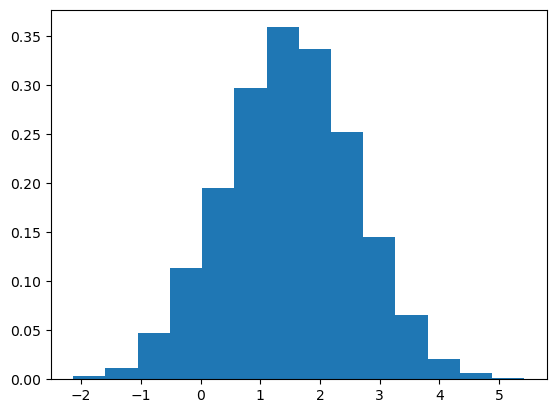

In [17]:
count, bins, ignored = plt.hist(s5transformed, 14, density=True)
plt.show()
# The Transformed distribution looks like a normal distribution.

In [18]:
# The s5 transformed inverted returns the original distribution, in this case the gamma distribution s5.
s5inverted = inv_boxcox(s5transformed, lmbd)
s5inverted

array([1.55252703, 4.48426075, 2.5695803 , ..., 2.42055918, 3.11811753,
       5.12976952])

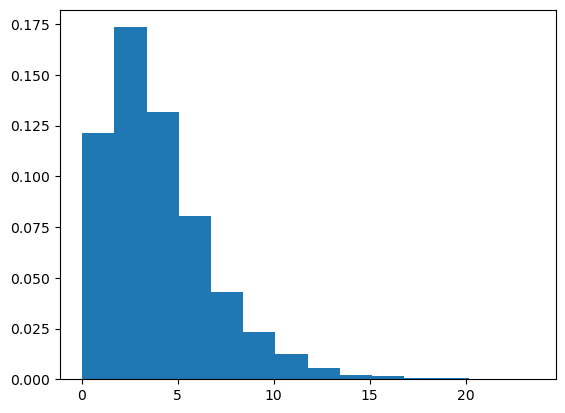

In [19]:
count, bins, ignored = plt.hist(s5inverted, 14, density=True)
plt.show()

# Central Limit Theorem (OPTIONAL)
[Return to Table of Contents](#Table-of-Contents)

The distribution of the sum (or mean) of a set of M identically-distributed random variables approaches a normal distribution as M approaches infinity. __The mean of the distribution of sample means is called the Expected Value and is always equal to the population mean μ__.

An individual sample mean probably will not be identical to its population mean; there will be some "error". Some sample means will be relatively close to μ and others will be relatively far away. __The standard error provides a measure of the standard distance between the sample mean and population mean μ__.

The mean of the distribution of sample means is called the Expected Value and is always equal to the population mean μ.
An individual sample mean probably will not be identical to its population mean; there will be some "error" Some sample means will be relatively close to μ and others will be relatively far away. The standard error provides a measure of the standard distance between the sample mean and population mean μ.

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


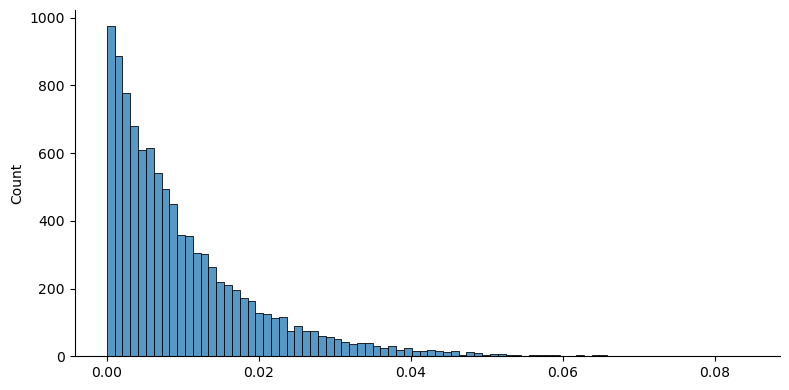

In [20]:
# Let's say we have a exponentially distributed data (population).
population = np.random.exponential(0.01, 10000)
plot = sns.displot(x = population , kind='hist', height = 4, aspect = 2)
plt.show()

Let's say we randomly chose *N* samples and we calculate their mean. <br>
We take another randomly chosen group of *N* samples and we calculate their mean.  <br>
We just repeat. Let's say *M* is the total number of these random group selection and mean calculation. <br>

According to the Central Limit theorem, the "means" we have calculated is normally distributed for large *M* no matter what *N* is (assuming *N* is not so small!). 

Let’s define a function that will create random samples from a distribution.  We can use sample function of pandas that will select random elements without replacement.

In [21]:
def random_samples(population, sample_qty, sample_size):
    global sample_means
    sample_means = []
    for i in range(sample_qty):
        sample = population.sample(n=sample_size)
        sample_mean = np.array(sample).mean()
        sample_means.append(sample_mean)
    return sample_means

N = 50 <br>
M = 5

In [22]:
population

array([0.0205369 , 0.0086793 , 0.01218286, ..., 0.01601486, 0.02659792,
       0.01509208])

In [23]:
# Converting the population to a Pandas Series for input into the random_samples function.
population_dataframe = pd.Series(population)
population_dataframe.head()

0    0.020537
1    0.008679
2    0.012183
3    0.013401
4    0.005225
dtype: float64

[0.008956668597463982, 0.00817019523333872, 0.010134237753859547, 0.009580616267617635, 0.011598448210479808]


C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


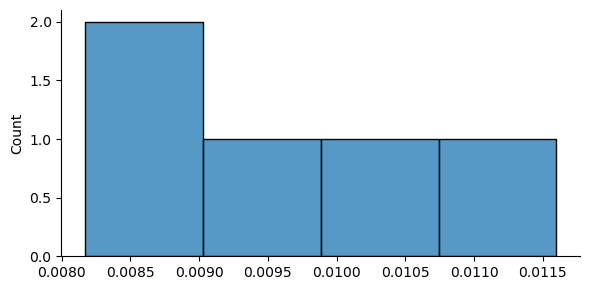

In [24]:
samples_from_normal = random_samples(population_dataframe, 5, 50)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)
print(sample_means)
plt.show()

N = 50 <br>
M = 50

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


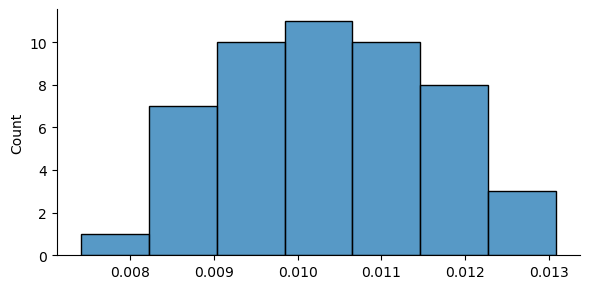

In [25]:
samples_from_normal = random_samples(population_dataframe, 50, 50)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)
plt.show()

N = 50 <br>
M = 500

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


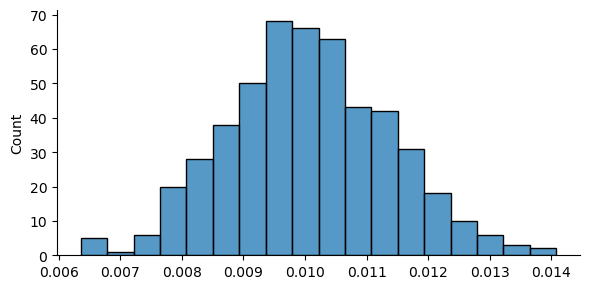

In [26]:
samples_from_normal = random_samples(population_dataframe, 500, 50)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)
plt.show()

But if we choose a small *N*, then it won't work. For example, <br>
N = 2 <br>
M = 5000

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


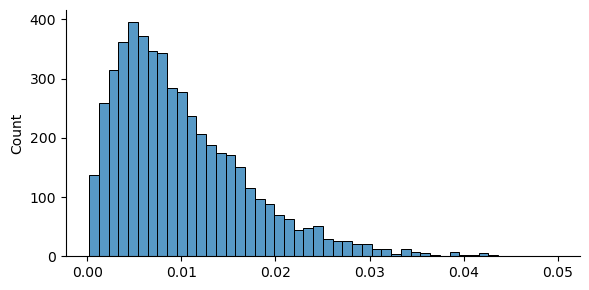

In [27]:
samples_from_normal = random_samples(population_dataframe, 5000, 2)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)
plt.show()

The shape of the distribution of sample means tends to be normal.  It is guaranteed to be normal if either the population from which the samples are obtained is normal, or the sample size is n = 30 or more.

# Outlier Detection with z-Score
[Return to Table of Contents](#Table-of-Contents)

Within the distribution of sample means, the location of each sample mean can be specified by a z-score (i.e., standards deviation from the mean). A positive z-score indicates a sample mean that is greater than the population mean (μ). The numerical value of the z-score indicates the distance between sample mean and μ measured in terms of the standard error.
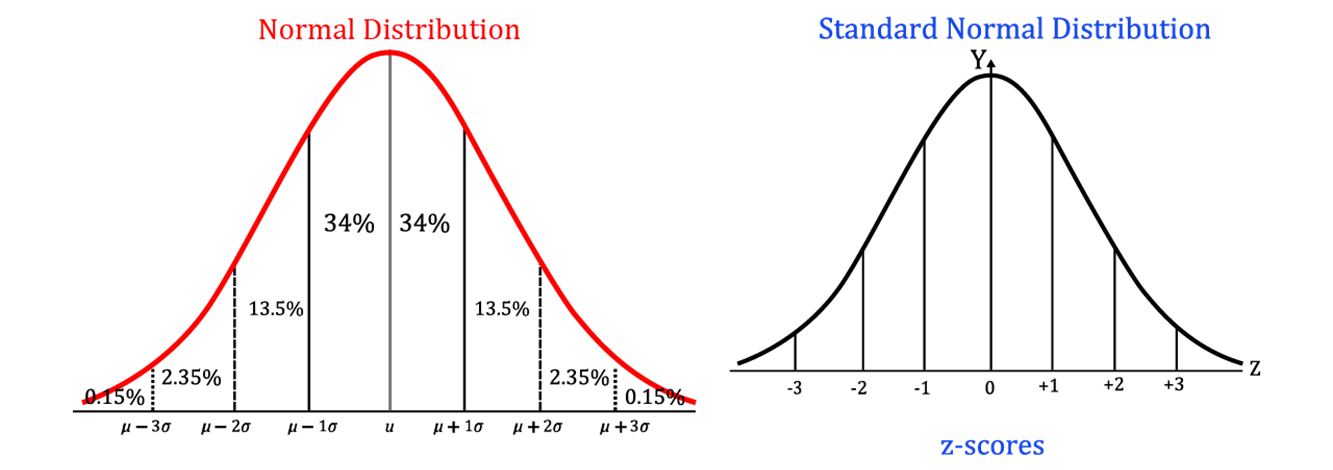

Probability and Sample Means:
- Because the distribution of sample means tends to be normal, the z-score value obtained for a sample mean can be used with the unit normal table to obtain probabilities.  
- The procedures for computing z-scores and finding probabilities for sample means are essentially the same as we used for individual scores
- When you are using sample means, you must remember to consider the sample size (N) and compute the standard error before you start any other computations.  
- You must be sure that the distribution of sample means satisfies at least one of the criteria for normal shape before you can use the unit normal table.

Standard Error of M
- The magnitude of the standard error is determined by two factors: σ and n. 
- The population standard deviation (σ), measures the standard distance between a single score and the population mean.  
- Thus, the standard deviation provides a measure of the "error" that is expected for the smallest possible sample, when N = 1.  
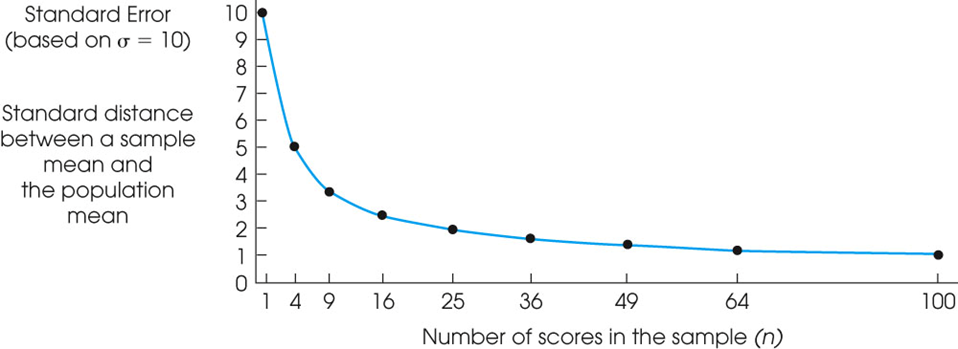

Documentation Reference:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

In [28]:
# let's load a sample dataset
# gvh = pd.read_csv("grade_vs_no_of_hours.csv")
gvh = pd.read_csv("https://raw.githubusercontent.com/fgonzaleumbc/DATA601/main/Lecture10/input_data/grade_vs_no_of_hours.csv")
print(gvh.shape)
gvh.head()

(101, 2)


,grade,no_of_hours
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


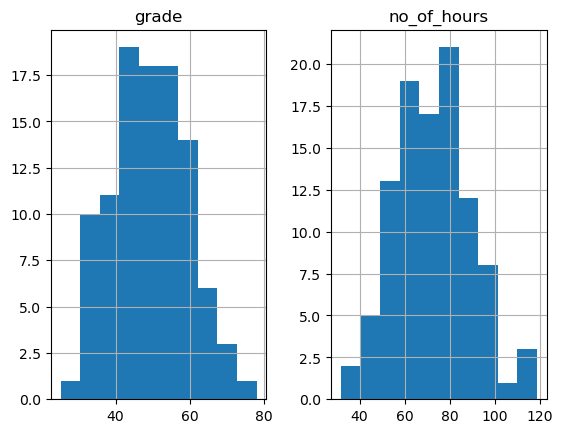

In [29]:
gvh.hist()
plt.show();

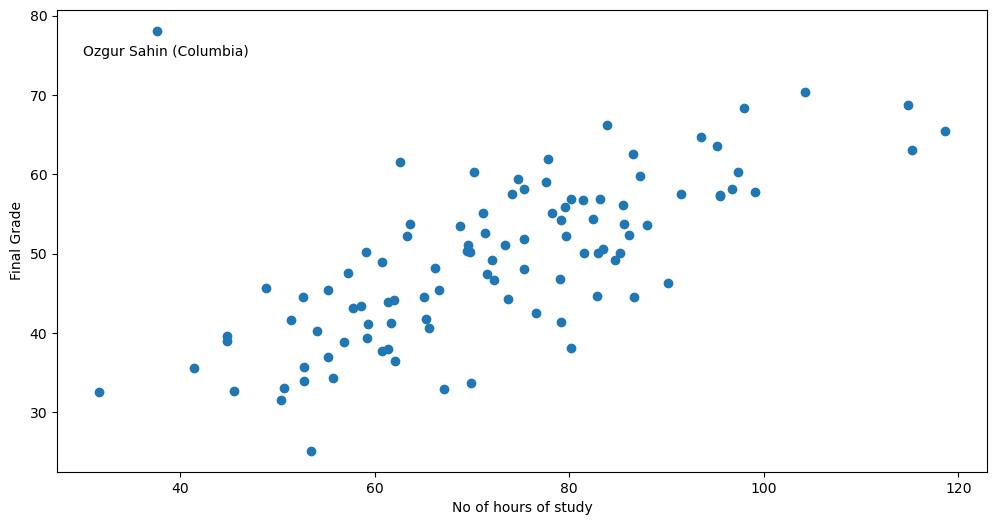

In [30]:
# Let's plot the data in a scatter plot.
fig = plt.figure(figsize=(12,6))
plt.scatter(x = gvh.no_of_hours, y = gvh['grade'])
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(x = 30, y = 75, s = 'Ozgur Sahin (Columbia)') # Prints string in plot x,y coordinates.
plt.show()

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


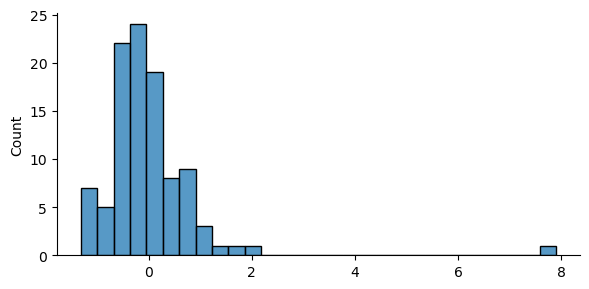

In [31]:
# let’s compute the z-Scores, plot them and see if we can identify any outliers.
grade_normalized_by_hour = gvh.iloc[:,0].values/gvh.iloc[:,1].values
z_scores_of_grade_normalized_by_hour = st.zscore(grade_normalized_by_hour)
plot = sns.displot(z_scores_of_grade_normalized_by_hour, 
                   kind='hist', height = 3, aspect = 2)
# Note the bar on the right it is outside of the main distribution.
# In the case above the outlier is very clear visually.
# However, the z-scores provide a statistical method rather than visual method.
plt.show()

In [32]:
z_scores_of_grade_normalized_by_hour

array([ 1.86809489,  0.4444002 ,  1.62966461, -0.20496558, -0.07808979,
        0.03287459, -0.25072945, -0.20151524, -0.34821865,  0.2162478 ,
        0.71120271, -0.23126019,  0.07405602,  0.41419636, -0.0156057 ,
        0.61300595, -0.91867475, -0.45936789,  1.34525563, -0.0965608 ,
        0.51498582, -0.84693099,  0.74564608,  0.6289817 , -0.06610328,
        0.54353297, -0.56722673, -0.17937681, -0.61977597, -0.53525351,
        0.71650667,  0.91491736, -0.83393697, -0.5633561 ,  0.44095577,
       -0.09687739,  0.55391514, -0.26847818, -0.64686497, -0.45728007,
        0.83963529,  0.23105901, -0.54665366,  0.08550612, -0.87540712,
        0.100823  ,  0.24869042, -0.518722  , -0.3270375 , -0.04480867,
       -1.28330881, -0.09015091, -0.45905592, -0.34526786, -0.02066691,
        0.42959901, -1.01048222,  0.13191283, -0.68053829, -0.0393492 ,
       -0.18164877,  0.11013489, -0.52152996,  0.85373446, -1.24994127,
        1.04623135, -0.24540114, -0.56704446,  0.90942462, -0.12

In [33]:
gvh

,grade,no_of_hours
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [34]:
# Let's use iloc to filter for the outlier.
gvh.iloc[z_scores_of_grade_normalized_by_hour > 2]

,grade,no_of_hours
100,78.1,37.6


Note that when calling the z_scores_of_grade_normalized_by_hour it is an array of values. When filtering for >2, it is relying in the index of the array and selecting the same index in the dataframe. If for whatever reason the indexes do not match you may get the wrong index. One example is when you do filtering of the main dataframe (e.g., gvh) and did not use the reset_index.

In [35]:
# Let's drop the outlier and recalculate.
gvh.drop(index=gvh.iloc[z_scores_of_grade_normalized_by_hour > 2].index.tolist(), inplace=True)

In [36]:
print(gvh.shape)
gvh.tail()
# In the case above the outlier was in the last row so reset_index makes no different.

(100, 2)


,grade,no_of_hours
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


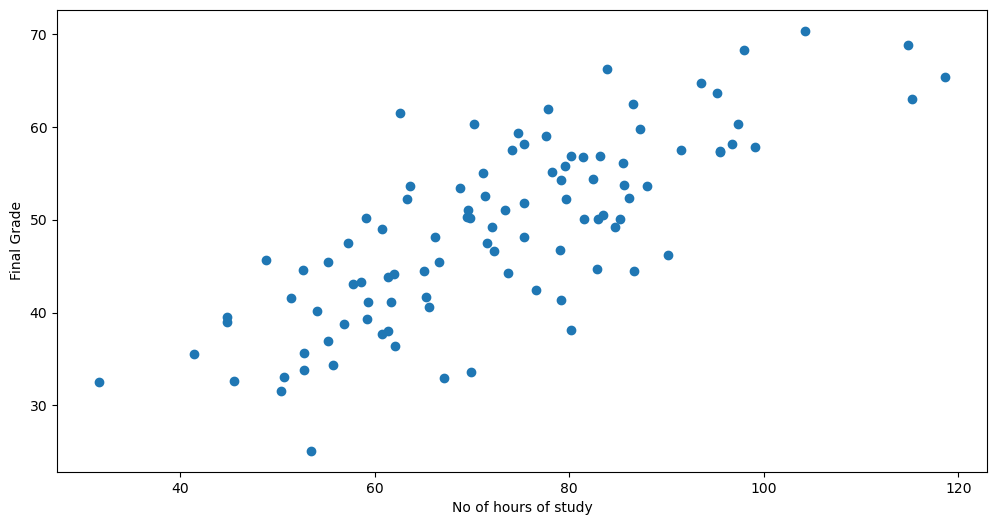

In [37]:
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.show()
# Plot with no outlier.

# Notebook End